In [1]:
# run this once to use physical qbits

from qiskit_ibm_runtime import QiskitRuntimeService
import os
 
QiskitRuntimeService.save_account(
  token=os.environ["QISKIT_API_KEY"], # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
  instance=os.environ["QISKIT_CRN"], # Optional
)

In [ ]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime.fake_provider import FakeLagosV2
from qiskit_aer import AerSimulator
from qiskit.primitives import EstimatorV2 as Estimator

In [71]:
N_BITS = 3

qft_gate = QFT(N_BITS)
qc = QuantumCircuit(N_BITS)
qc.append(qft_gate, range(N_BITS))
qc.measure_all()

/tmp/ipykernel_19850/1078260894.py:3: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_gate = QFT(N_BITS)


In [ ]:
backend = FakeLagosV2()
ideal_simulator = Estimator()
hardware_simulator = AerSimulator.from_backend(backend=backend)

In [75]:
transpiled_ideal = transpile(qc, backend=ideal_simulator, optimization_level=3)
ideal_result = ideal_simulator.run(transpiled_ideal).result()

In [77]:
transpiled_hardware = transpile(qc, backend=hardware_simulator, optimization_level=3)
hardware_result = hardware_simulator.run(transpiled_hardware).result()

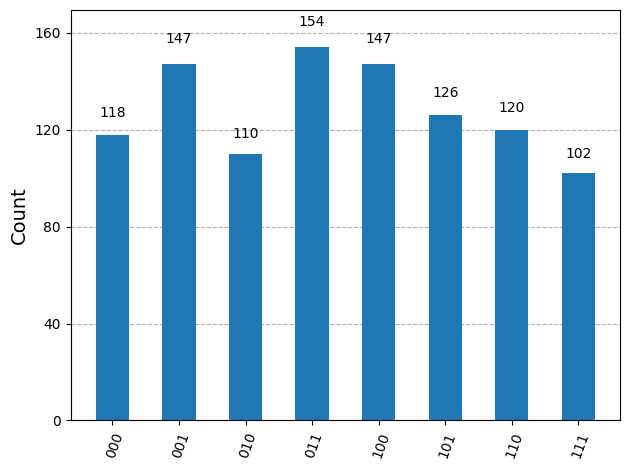

In [83]:
plot_histogram(ideal_result.get_counts(transpiled_ideal))

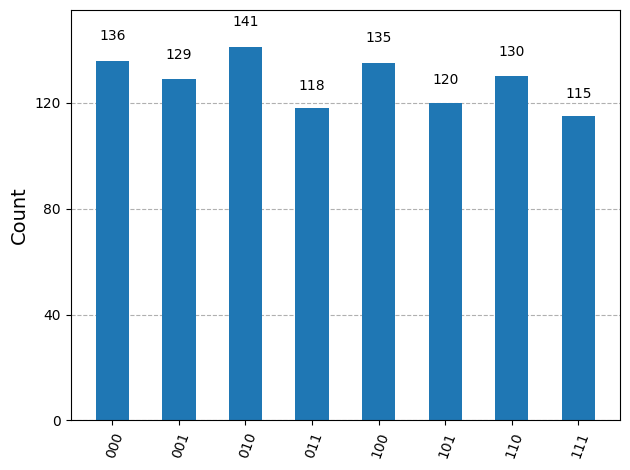

In [82]:
from qiskit.visualization import plot_histogram
plot_histogram(hardware_result.get_counts(transpiled_hardware))